In [1]:
import numpy as np
from PIL import Image
import torch
from torchvision import models, transforms
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import os

%matplotlib inline

# Test

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from utils import *

In [2]:
img_id = 5

img_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)

img, bbs = load_image_and_bbs(img_path, bb_path) 

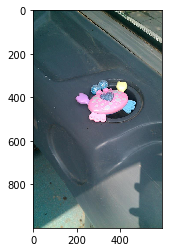

In [3]:
plt.figure()
plt.imshow(img)

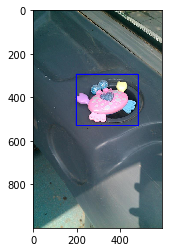

In [4]:
show_img_with_bbs(img, bbs)

In [5]:
from cnn_cbir import SearchEngine, FeatureExtractor

test_dir = '../SIFT-BOW-CBIR/Images'
feature_extrator = FeatureExtractor()
engine = SearchEngine(test_dir, feature_extrator)

In [6]:
engine.build()

2020-03-21 14:54:41,754 - INFO - Write database feature matrix into memory...
2020-03-21 14:54:41,755 - INFO - cached database feature matrix found in feature_cache/db_fea_mat.pth, loading it directly.


In [7]:
img = cv2.imread(engine.im_paths[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
similar_imgs = engine.retrieve_img(img, top_k=5)

2020-03-21 14:54:44,930 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 14:54:44,930 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 14:54:44,931 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 14:54:44,931 - DEBUG - ag_feat_vec.size(): torch.Size([512])


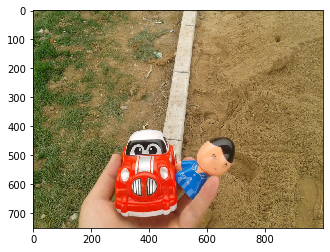

In [8]:
plt.figure()
plt.imshow(img)

0.9999999403953552
0.8507266044616699
0.8503950834274292
0.8361871242523193
0.8262256383895874


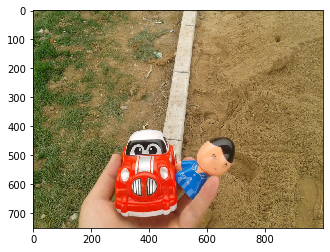

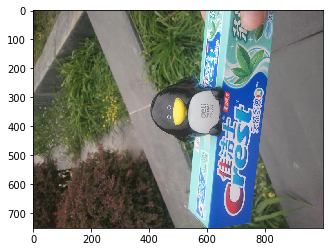

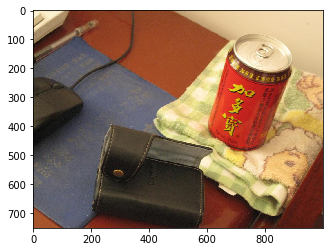

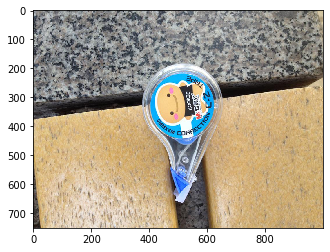

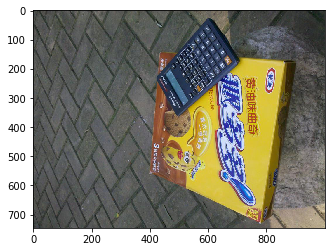

In [9]:
for im_path, score in similar_imgs:
    print(score)
    im = cv2.imread(im_path)[:, :, ::-1]
    plt.figure()
    plt.imshow(im)

In [10]:
img_id = 5
img_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)
img, bbs = load_image_and_bbs(img_path, bb_path) 

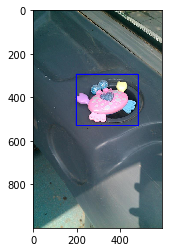

In [11]:
show_img_with_bbs(img, bbs)

In [12]:
similar_imgs = engine.retrieve_object(img, bbs, top_k=5)

2020-03-21 14:54:53,775 - DEBUG - fea_size(): torch.Size([1, 28, 512])
2020-03-21 14:54:53,776 - DEBUG - regions_ijww.shape: (28, 4)
2020-03-21 14:54:53,776 - DEBUG - reg_feat_mat.size(): torch.Size([28, 512])
2020-03-21 14:54:53,777 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:54:53,830 - INFO - computing bounding box for retrieved 5 images...
  0%|          | 0/5 [00:00<?, ?it/s]2020-03-21 14:54:53,831 - INFO - computing bounding boxes in ../SIFT-BOW-CBIR/Images/01078.jpg
2020-03-21 14:54:53,831 - INFO - cached feature for ../SIFT-BOW-CBIR/Images/01078.jpg is found, directly loading it.
2020-03-21 14:54:53,834 - DEBUG - feat_im.size(): torch.Size([22, 512])
2020-03-21 14:54:53,834 - DEBUG - feat_patch.size(): torch.Size([512])
2020-03-21 14:54:53,834 - DEBUG - similarity.size(): torch.Size([22])
2020-03-21 14:54:53,842 - INFO - computing bounding boxes in ../SIFT-BOW-CBIR/Images/04023.jpg
2020-03-21 14:54:53,842 - INFO - cached feature for ../SIFT-BOW-CBIR/Images/040

0.7326624393463135
0.7121790051460266
0.6977733969688416
0.696121096611023
0.6863822340965271


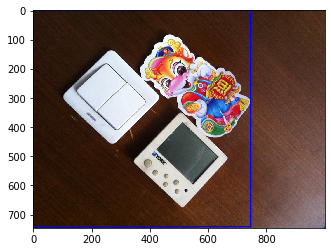

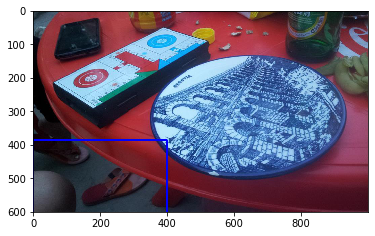

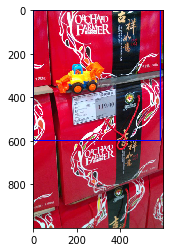

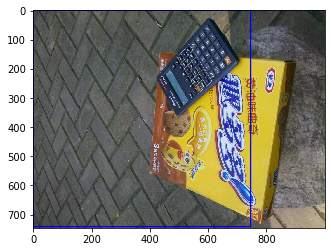

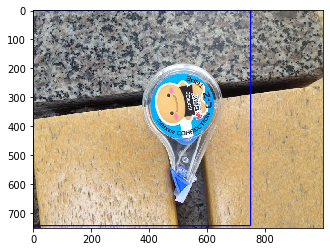

In [13]:
for im_path, score, bbs in similar_imgs:
    print(score)
    im = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
    show_img_with_bbs(im, bbs)

# large scale test

In [1]:
from cnn_cbir import SearchEngine, FeatureExtractor

data_dir = '/home/zhulei/Data/pg_data/Images'
fea_extractor = FeatureExtractor(cache_dir='largedata_cache')
search_engine = SearchEngine(data_dir, fea_extractor)

In [2]:
search_engine.build()

2020-03-21 16:22:13,338 - INFO - building database feature matrix...
2020-03-21 16:22:13,353 - INFO - cached database feature matrix is found in largedata_cache/db_fea_mat.pth, loading it directly.


In [17]:
from utils import load_image_and_bbs, show_img_with_bbs
import cv2

img_id = 25
# img_id = 4
# img_id = 10
img_id = 5

im_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)


img, bbs = load_image_and_bbs(im_path, bb_path)

In [18]:
similar_imgs = search_engine.retrieve_object(img, bbs, top_k=10)

2020-03-21 16:25:42,333 - INFO - computing bounding box for retrieved 10 images...
100%|██████████| 10/10 [00:00<00:00, 101.08it/s]


/home/zhulei/Data/pg_data/Images/11212.jpg
[[193.   0. 387. 395.]]
/home/zhulei/Data/pg_data/Images/03019.jpg
[[  0.   0. 750. 741.]]
/home/zhulei/Data/pg_data/Images/02918.jpg
[[  0.   0. 580. 593.]]
/home/zhulei/Data/pg_data/Images/22986.jpg
[[290.   0. 580. 593.]]
/home/zhulei/Data/pg_data/Images/01000.jpg
[[290.   0. 580. 593.]]
/home/zhulei/Data/pg_data/Images/19368.jpg
[[290.   0. 580. 593.]]
/home/zhulei/Data/pg_data/Images/09104.jpg
[[  0. 225. 489. 483.]]
/home/zhulei/Data/pg_data/Images/02094.jpg
[[  0. 322. 358. 354.]]
/home/zhulei/Data/pg_data/Images/26018.jpg
[[  0.   0. 580. 593.]]
/home/zhulei/Data/pg_data/Images/17268.jpg
[[258. 131. 290. 296.]]


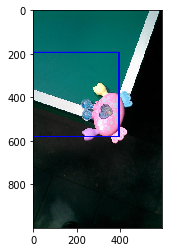

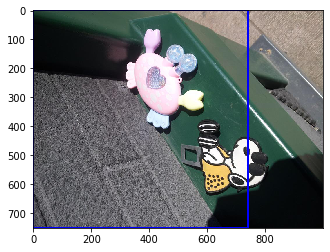

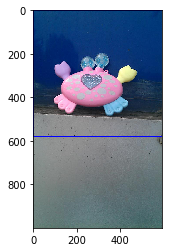

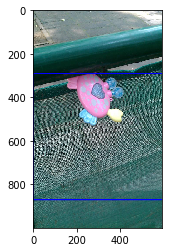

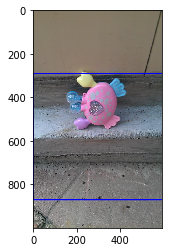

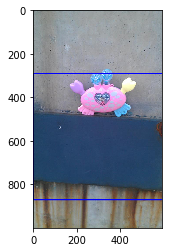

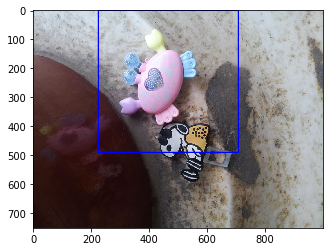

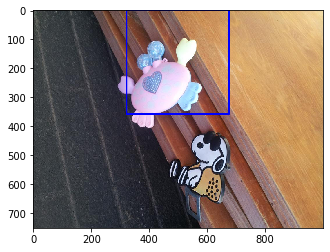

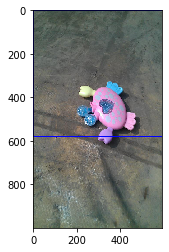

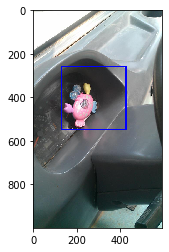

In [19]:
for img_path, score, bbs in similar_imgs:
    print(img_path)
    print(bbs)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    show_img_with_bbs(img, bbs, 'ijhw_mat')